# Space Time Metric Inside a Rotating Cylinder by Davies and Caplan
##  Geoff Cope
##  Univeristy of Utah
##  December 30, 2021

Here we work with metric 1.2 with the m set equal to k but nonzero a.

https://www.cambridge.org/core/journals/mathematical-proceedings-of-the-cambridge-philosophical-society/article/abs/spacetime-metric-inside-a-rotating-cylinder/0EE2FEBAD1331F8E630A9E6DC09451D0

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
r,phi,z,t,dr,dphi,dz,dt = symbols( 'r phi z t dr dphi dz dt' ) 

In [4]:
u = Function('u')(r,z)
u

In [12]:
a = Function('a')(r,z)
a

In [6]:
k = Function('k')(r,z)
k

In [7]:
m = Function('m')(r,z)
m

In [8]:
variables = Matrix( [r,phi,z,t] )
variables

⎡r⎤
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣t⎦

In [9]:
differentials = Matrix( [dr,dphi,dz,dt] ) 
differentials

⎡ dr ⎤
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣ dt ⎦

In [15]:
lineElement = expand(exp(2*u) * (dt + a*dphi)**2 - exp(-2*u) * ( exp(2*k)*dr**2 + exp(2*k)*dz**2 + r**2 * dphi**2))
lineElement

In [16]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅k(r, z)  -2⋅u(r, z)                                                                    
⎢-ℯ         ⋅ℯ                              0                                0              
⎢                                                                                           
⎢                            2  -2⋅u(r, z)    2        2⋅u(r, z)                            
⎢           0             - r ⋅ℯ           + a (r, z)⋅ℯ                      0             a
⎢                                                                                           
⎢                                                                   2⋅k(r, z)  -2⋅u(r, z)   
⎢           0                               0                     -ℯ         ⋅ℯ             
⎢                                                                                           
⎢                                            2⋅u(r, z)                                      
⎣           0                       a(r, z)⋅ℯ                         

In [17]:
import sympy

In [18]:
m = sympy.Array(g)
m

⎡  2⋅k(r, z)  -2⋅u(r, z)                                                                    
⎢-ℯ         ⋅ℯ                              0                                0              
⎢                                                                                           
⎢                            2  -2⋅u(r, z)    2        2⋅u(r, z)                            
⎢           0             - r ⋅ℯ           + a (r, z)⋅ℯ                      0             a
⎢                                                                                           
⎢                                                                   2⋅k(r, z)  -2⋅u(r, z)   
⎢           0                               0                     -ℯ         ⋅ℯ             
⎢                                                                                           
⎢                                            2⋅u(r, z)                                      
⎣           0                       a(r, z)⋅ℯ                         

In [19]:
from einsteinpy.symbolic import *

In [20]:
syms = sympy.symbols("r phi z t")
r,phi,z,t = syms

In [21]:
metric = MetricTensor(m,syms)

In [22]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂                                                                           
⎢⎢──(k(r, z)) - ──(u(r, z))                                              0                  
⎢⎢∂r            ∂r                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                                                                                          
⎢⎢                           ⎛ 2 ∂                 ⎛        ∂         

In [25]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                 ∂         
⎢    2              2                           2     2              2            ──(k(r, z)
⎢   ∂              ∂               ⎛∂          ⎞     ∂              ∂             ∂r        
⎢- ───(k(r, z)) - ───(k(r, z)) - 2⋅⎜──(u(r, z))⎟  + ───(u(r, z)) + ───(u(r, z)) + ──────────
⎢    2              2              ⎝∂r         ⎠      2              2                 r    
⎢  ∂r             ∂z                                ∂r             ∂z                       
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

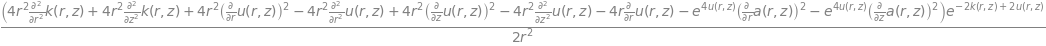

In [24]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [26]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                 ∂         
⎢    2              2                           2     2              2            ──(k(r, z)
⎢   ∂              ∂               ⎛∂          ⎞     ∂              ∂             ∂r        
⎢- ───(k(r, z)) - ───(k(r, z)) - 2⋅⎜──(u(r, z))⎟  + ───(u(r, z)) + ───(u(r, z)) + ──────────
⎢    2              2              ⎝∂r         ⎠      2              2                 r    
⎢  ∂r             ∂z                                ∂r             ∂z                       
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [27]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

In [28]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                 ∂         
⎢    2              2                           2     2              2            ──(k(r, z)
⎢   ∂              ∂               ⎛∂          ⎞     ∂              ∂             ∂r        
⎢- ───(k(r, z)) - ───(k(r, z)) - 2⋅⎜──(u(r, z))⎟  + ───(u(r, z)) + ───(u(r, z)) + ──────────
⎢    2              2              ⎝∂r         ⎠      2              2                 r    
⎢  ∂r             ∂z                                ∂r             ∂z                       
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [29]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡                                                                                       2   
⎢                                            ∂                   4⋅u(r, z) ⎛∂          ⎞    
⎢               2                    2   1.0⋅──(k(r, z))   0.25⋅ℯ         ⋅⎜──(a(r, z))⎟    
⎢  ⎛∂          ⎞        ⎛∂          ⎞        ∂r                            ⎝∂r         ⎠    
⎢- ⎜──(u(r, z))⎟  + 1.0⋅⎜──(u(r, z))⎟  + ─────────────── + ────────────────────────────── - 
⎢  ⎝∂r         ⎠        ⎝∂z         ⎠           r                         2                 
⎢                                                                        r                  
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [53]:
constraintkz = Eq(diff(k,z),solve( ricciSimplified[2,0], diff(k,z))[0] ) 
constraintkz

In [54]:
constraintkr =  Eq( diff(k,r) , expand( solve( einsteinSimplifed[0,0] , diff(k,r) )[0] ) )
constraintkr

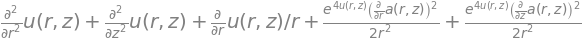

In [55]:
uwave = expand( (1/r**2)*ricciSimplified[3,3].args[1] ) 
uwave 

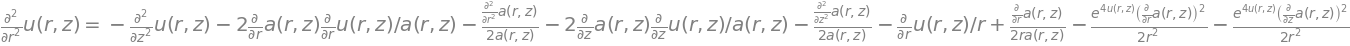

In [49]:
d2udr2 = Eq(diff(u,r,r) , expand(solve( ricciSimplified[3,1].args[2] , diff(u,r,r) )[0] ) )
d2udr2

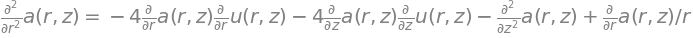

In [56]:
awave = Eq( diff(a,r,r) , solve( ricciSimplified[1,1].args[1].subs(d2udr2.args[0],d2udr2.args[1]) , diff(a,r,r) )[0] )
awave

In [59]:
vacuumFieldEquations = Matrix([awave,uwave,constraintkz,constraintkr])
vacuumFieldEquations

⎡                                                                                           
⎢              2                                                                        2   
⎢             ∂                 ∂           ∂               ∂           ∂              ∂    
⎢            ───(a(r, z)) = - 4⋅──(a(r, z))⋅──(u(r, z)) - 4⋅──(a(r, z))⋅──(u(r, z)) - ───(a(
⎢              2                ∂r          ∂r              ∂z          ∂z              2   
⎢            ∂r                                                                       ∂z    
⎢                                                                                           
⎢                                                                                 2         
⎢                                           ∂              4⋅u(r, z) ⎛∂          ⎞     4⋅u(r
⎢               2              2            ──(u(r, z))   ℯ         ⋅⎜──(a(r, z))⎟    ℯ     
⎢              ∂              ∂             ∂r                       ⎝